# 1 - DEFINE THE PROBLEM
------------------------
The goal of this project is ...

# 2 - IMPORT REQUIRED LIBRARIES  
------------------------------

## 2.1 - Base Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import string

## 2.2 - ML/DL Libraries

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# 3 - LOAD THE DATA
---

In [3]:
data_housing = pd.read_csv('../datasets/housing.csv')

data_titanic = pd.read_csv('../datasets/train.csv')

conn = sqlite3.connect('../datasets/classic_rock.db')
data_roc = pd.read_sql_query('SELECT * FROM rock_plays', conn)

with open('../datasets/imagenet_class_names.txt', 'r') as file:
    class_names = [line.strip() for line in file.readlines() if line.strip()]
# Convert to DataFrame for analysis
data_imagenet = pd.DataFrame(class_names, columns=['class_name'])
data_imagenet = pd.DataFrame(class_names, columns=['class_name'])
data_imagenet['length'] = data_imagenet['class_name'].apply(len)
data_imagenet['first_letter'] = data_imagenet['class_name'].str[0]

# 4 - EDA (Exploratory Data Analysis) of the DATA
---

## 4.1 - Basic Overview (head)

In [4]:
data_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_roc.head()

,SONG RAW,Song Clean,ARTIST RAW,ARTIST CLEAN,CALLSIGN,TIME,UNIQUE_ID,COMBINED,First?,date_time,day_of_week
0,Caught Up In (live),Caught Up in You,.38 Special,.38 Special,KGLK,1402943314,KGLK1536,Caught Up in You by .38 Special,1,2014-06-16 18:28:34,0
1,Caught Up In You,Caught Up in You,.38 Special,.38 Special,KGB,1403398735,KGB0260,Caught Up in You by .38 Special,0,2014-06-22 00:58:55,6
2,Caught Up In You,Caught Up in You,.38 Special,.38 Special,KGB,1403243924,KGB0703,Caught Up in You by .38 Special,0,2014-06-20 05:58:44,4
3,Caught Up in You,Caught Up in You,.38 Special,.38 Special,KGLK,1403470732,KGLK0036,Caught Up in You by .38 Special,0,2014-06-22 20:58:52,6
4,Caught Up in You,Caught Up in You,.38 Special,.38 Special,KGLK,1403380737,KGLK0312,Caught Up in You by .38 Special,0,2014-06-21 19:58:57,5


In [7]:
data_imagenet.head()

,class_name,length,first_letter
0,"n01440764 tench, Tinca tinca",28,n
1,"n01443537 goldfish, Carassius auratus",37,n
2,"n01484850 great white shark, white shark, man-...",93,n
3,"n01491361 tiger shark, Galeocerdo cuvieri",41,n
4,"n01494475 hammerhead, hammerhead shark",38,n


## 4.2 - Check for Missing Values (isnull)

In [8]:
data_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data_roc.isnull().sum()

SONG RAW         0
Song Clean      26
ARTIST RAW       5
ARTIST CLEAN     8
CALLSIGN         0
TIME             0
UNIQUE_ID        0
COMBINED         0
First?           0
date_time        0
day_of_week      0
dtype: int64

In [11]:
data_imagenet.isnull().sum()

class_name      0
length          0
first_letter    0
dtype: int64

## 4.3 - Analyze Data Types (dtypes)

In [12]:
data_housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [13]:
data_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
data_roc.dtypes

SONG RAW        object
Song Clean      object
ARTIST RAW      object
ARTIST CLEAN    object
CALLSIGN        object
TIME             int64
UNIQUE_ID       object
COMBINED        object
First?           int64
date_time       object
day_of_week      int64
dtype: object

In [15]:
data_imagenet.dtypes

class_name      object
length           int64
first_letter    object
dtype: object

## 4.x - Other (info)

In [16]:
# Display general information about the dataset
# Includes number of entries, non-null counts, and data types for each column
print(data_housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [17]:
# Display general information about the dataset
# Includes number of entries, non-null counts, and data types for each column
print(data_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [18]:
# Display general information about the dataset
# Includes number of entries, non-null counts, and data types for each column
print(data_roc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37673 entries, 0 to 37672
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SONG RAW      37673 non-null  object
 1   Song Clean    37647 non-null  object
 2   ARTIST RAW    37668 non-null  object
 3   ARTIST CLEAN  37665 non-null  object
 4   CALLSIGN      37673 non-null  object
 5   TIME          37673 non-null  int64 
 6   UNIQUE_ID     37673 non-null  object
 7   COMBINED      37673 non-null  object
 8   First?        37673 non-null  int64 
 9   date_time     37673 non-null  object
 10  day_of_week   37673 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 3.2+ MB
None


In [19]:
# Display general information about the dataset
# Includes number of entries, non-null counts, and data types for each column
print(data_imagenet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   class_name    1000 non-null   object
 1   length        1000 non-null   int64 
 2   first_letter  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB
None


## 4.x - Other (describe)

In [20]:
# Show summary statistics for numerical columns
# Includes count, mean, std deviation, min, 25%, median (50%), 75%, and max
print(data_housing.describe(include='all'))

           longitude      latitude  housing_median_age   total_rooms  \
count   20640.000000  20640.000000        20640.000000  20640.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.569704     35.631861           28.639486   2635.763081   
std         2.003532      2.135952           12.585558   2181.615252   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.800000     33.930000           18.000000   1447.750000   
50%      -118.490000     34.260000           29.000000   2127.000000   
75%      -118.010000     37.710000           37.000000   3148.000000   
max      -114.310000     41.950000           52.000000  39320.000000   

        total_bedrooms    population    households  median_income  \
count     20433.000000  20640.000000  20640.000000   20640.000000 

In [21]:
# Show summary statistics for numerical columns
# Includes count, mean, std deviation, min, 25%, median (50%), 75%, and max
print(data_titanic.describe(include='all'))

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

In [22]:
# Show summary statistics for numerical columns
# Includes count, mean, std deviation, min, 25%, median (50%), 75%, and max
print(data_roc.describe(include='all'))

        SONG RAW Song Clean    ARTIST RAW  ARTIST CLEAN CALLSIGN  \
count      37673      37647         37668         37665    37673   
unique      3710       2158           867           476       25   
top     Dream On   Dream On  Led Zeppelin  Led Zeppelin     KSEG   
freq         126        142          1363          1556     1821   
mean         NaN        NaN           NaN           NaN      NaN   
std          NaN        NaN           NaN           NaN      NaN   
min          NaN        NaN           NaN           NaN      NaN   
25%          NaN        NaN           NaN           NaN      NaN   
50%          NaN        NaN           NaN           NaN      NaN   
75%          NaN        NaN           NaN           NaN      NaN   
max          NaN        NaN           NaN           NaN      NaN   

                TIME UNIQUE_ID               COMBINED        First?  \
count   3.767300e+04     37673                  37673  37673.000000   
unique           NaN     37673           

In [23]:
# Show summary statistics for numerical columns
# Includes count, mean, std deviation, min, 25%, median (50%), 75%, and max
data_imagenet.describe(include='all')

,class_name,length,first_letter
count,1000,1000.000000,1000
unique,1000,NaN,1
top,"n01440764 tench, Tinca tinca",NaN,n
freq,1,NaN,1000
mean,NaN,30.675000,NaN
std,NaN,16.886638,NaN
min,NaN,12.000000,NaN
25%,NaN,18.000000,NaN
50%,NaN,26.000000,NaN
75%,NaN,37.000000,NaN


# 5 - VISUALIZE THE DATA
---

## 5.1 - Univariate Analysis

### Data_housing

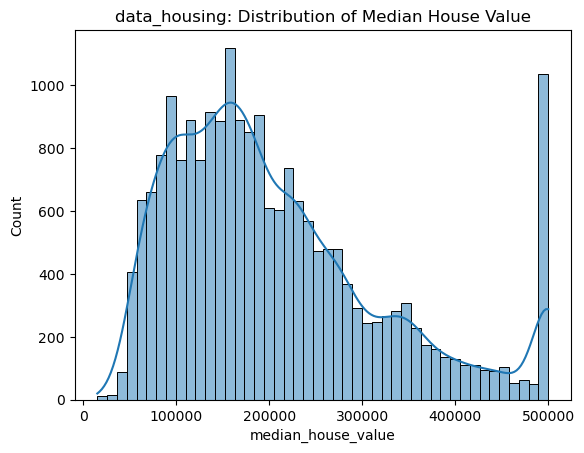

In [24]:
sns.histplot(data_housing['median_house_value'], kde=True)
plt.title('data_housing: Distribution of Median House Value')
plt.show()

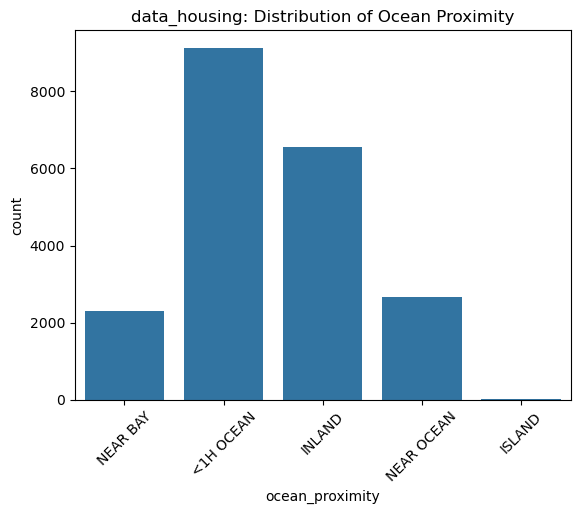

In [25]:
sns.countplot(x='ocean_proximity', data=data_housing)
plt.title('data_housing: Distribution of Ocean Proximity')
plt.xticks(rotation=45)
plt.show()

### Data_Titanic

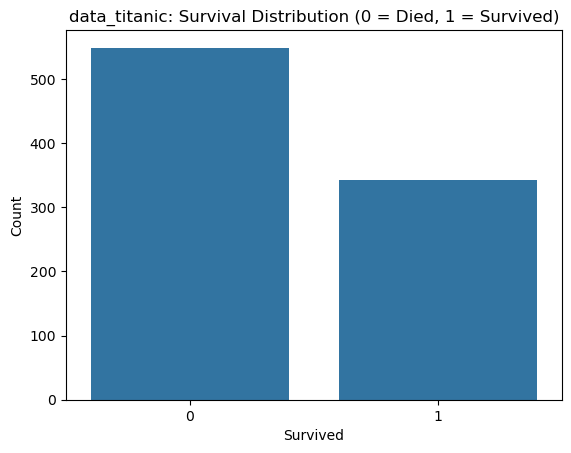

In [26]:
# Survival Distribution
sns.countplot(x='Survived', data=data_titanic)
plt.title('data_titanic: Survival Distribution (0 = Died, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

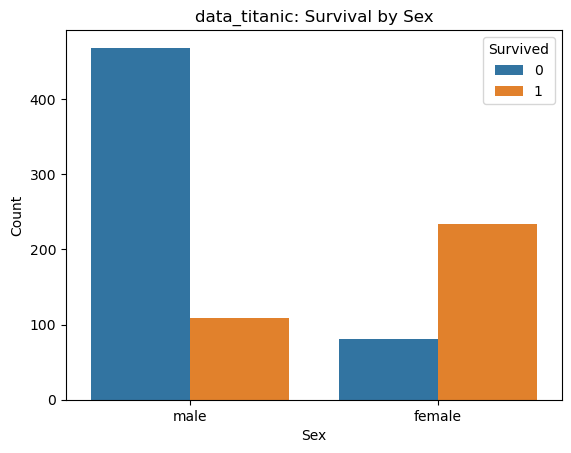

In [27]:
# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=data_titanic)
plt.title('data_titanic: Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

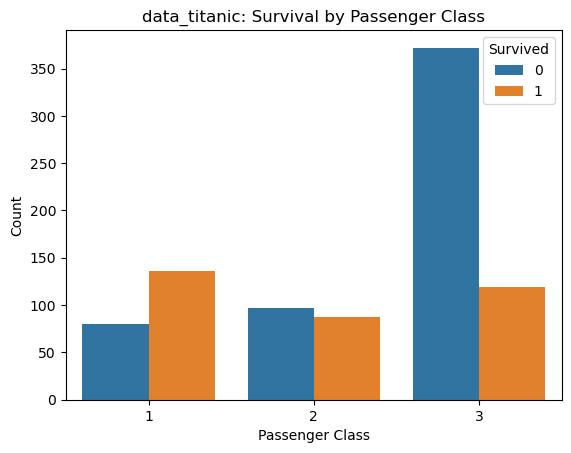

In [28]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=data_titanic)
plt.title('data_titanic: Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

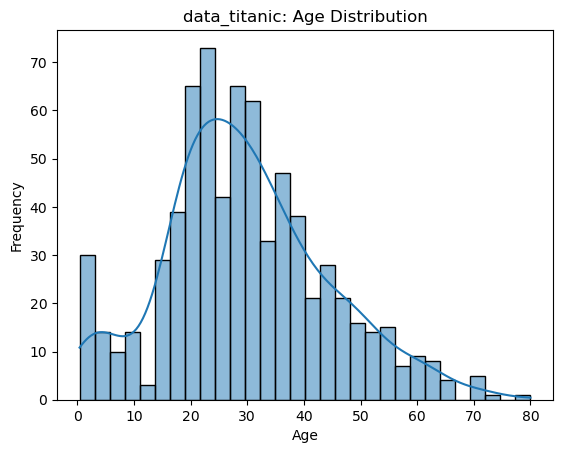

In [29]:
# Age distribution
sns.histplot(data=data_titanic, x='Age', bins=30, kde=True)
plt.title('data_titanic: Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Data_rocK

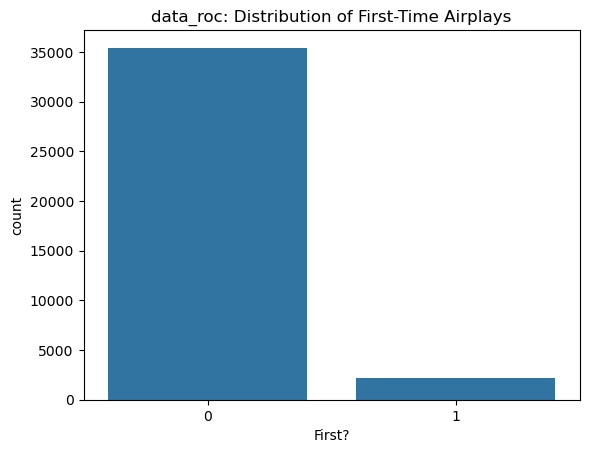

In [30]:
sns.countplot(x='First?', data=data_roc)
plt.title('data_roc: Distribution of First-Time Airplays')
plt.show()

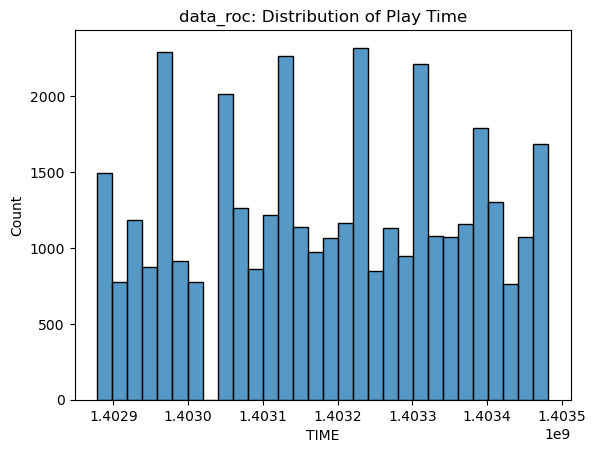

In [31]:
sns.histplot(data_roc['TIME'], bins=30)
plt.title('data_roc: Distribution of Play Time')
plt.show()

### Data_imagenet

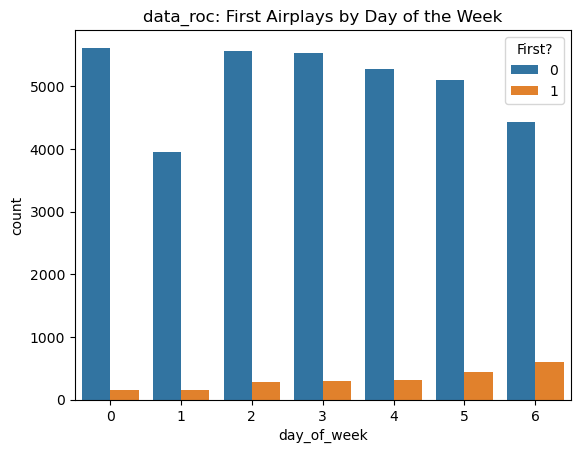

In [32]:
sns.countplot(x='day_of_week', hue='First?', data=data_roc)
plt.title('data_roc: First Airplays by Day of the Week')
plt.show()

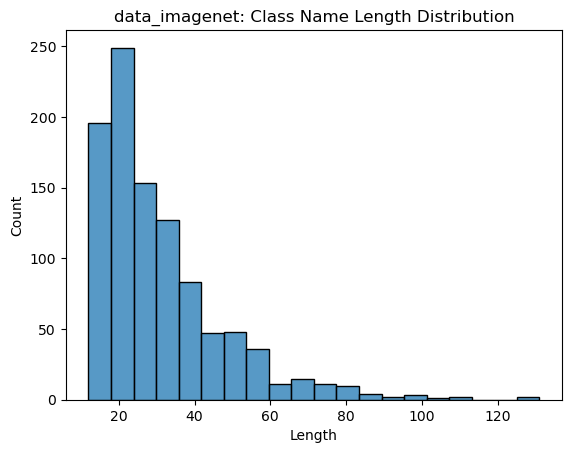

In [33]:
# Histogram of class name lengths
sns.histplot(data_imagenet['length'], bins=20)
plt.title('data_imagenet: Class Name Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

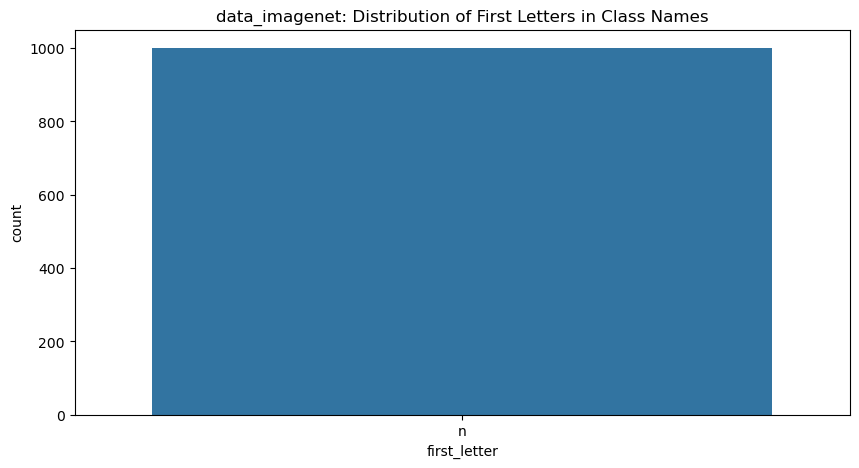

In [34]:
# Frequency of first letters
plt.figure(figsize=(10, 5))
sns.countplot(x='first_letter', data=data_imagenet,
              order=sorted(data_imagenet['first_letter'].unique()))
plt.title('data_imagenet: Distribution of First Letters in Class Names')
plt.show()

## 5.2 - Bivariate / Multivariate Analysis

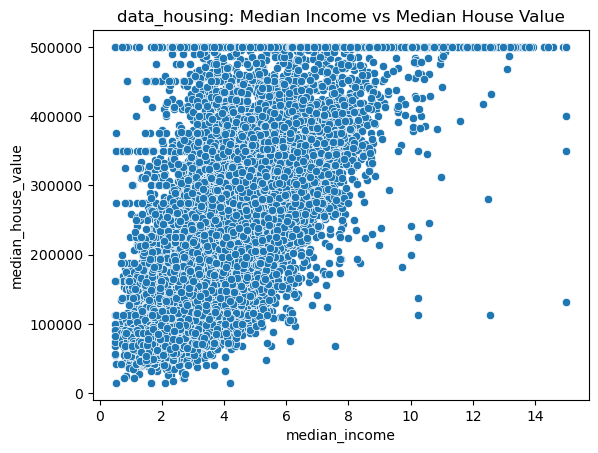

In [35]:
sns.scatterplot(x='median_income', y='median_house_value', data=data_housing)
plt.title('data_housing: Median Income vs Median House Value')
plt.show()

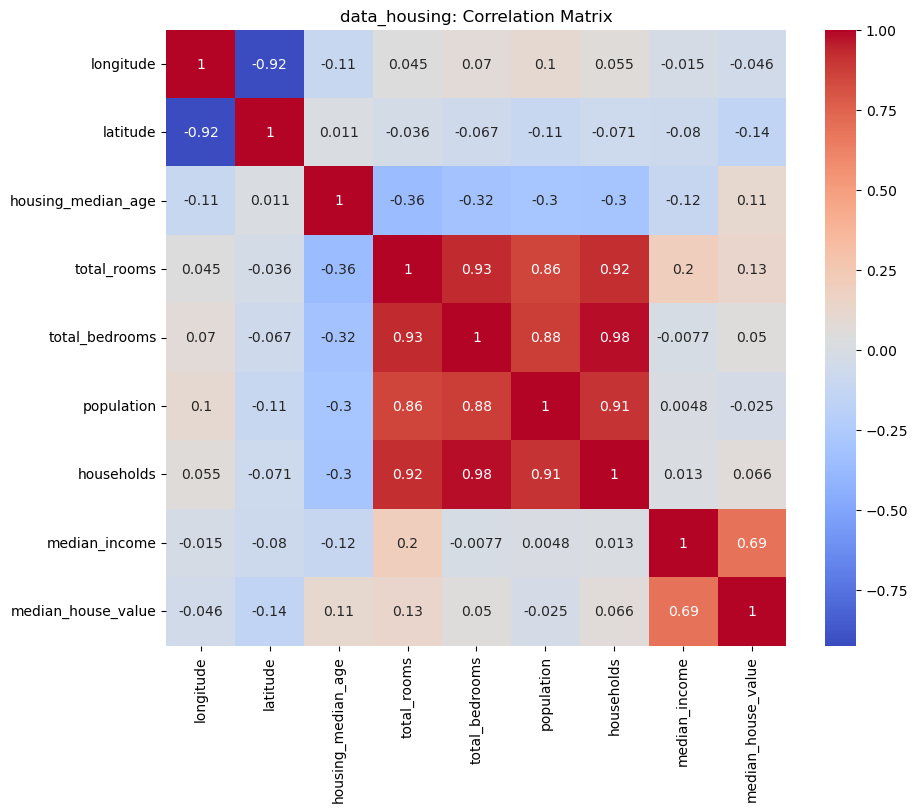

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_housing.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('data_housing: Correlation Matrix')
plt.show()

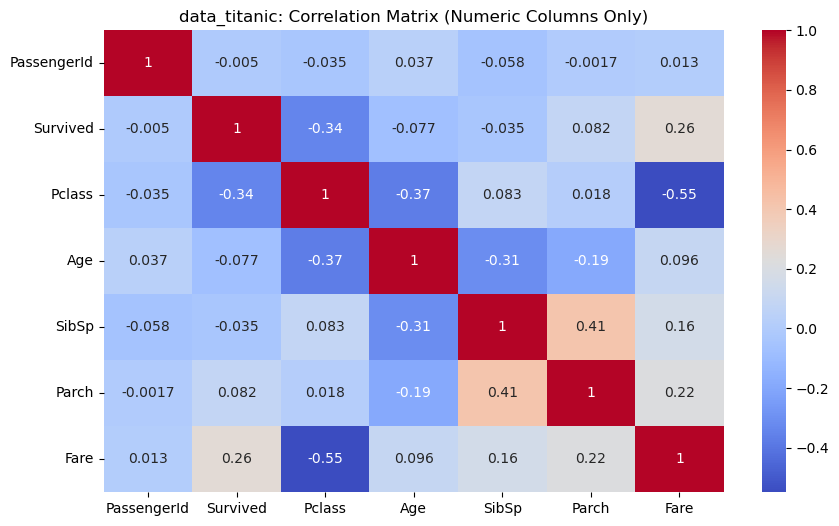

In [37]:
# Correlation Heatmap (numeric only)
plt.figure(figsize=(10, 6))
sns.heatmap(data_titanic.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('data_titanic: Correlation Matrix (Numeric Columns Only)')
plt.show()

# 6 - PREPROCESS THE DATA
---

### DATA_HOUSING

## 6.1 – HANDLE MISSING VALUES

In [38]:
# Step 1: Copy the original dataset and drop the target
X = data_housing.drop('median_house_value', axis=1)

In [39]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [40]:
# Step 2: Check missing values before
print("data_housing: 🔍 Missing values before imputation:")
print(X[['total_bedrooms']].isnull().sum())

data_housing: 🔍 Missing values before imputation:
total_bedrooms    207
dtype: int64


In [41]:
# Step 3: Apply median imputation
imputer = SimpleImputer(strategy='median')

In [42]:
imputer

SimpleImputer(strategy='median')

In [43]:
X_imputed = X.copy()
X_imputed[['total_bedrooms']] = imputer.fit_transform(X[['total_bedrooms']])

In [44]:
X_imputed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [45]:
# Step 4: Check missing values after
print("\n✅ Missing values after imputation:")
print(X_imputed[['total_bedrooms']].isnull().sum())


✅ Missing values after imputation:
total_bedrooms    0
dtype: int64


In [46]:
# Original dataset without the target
X = data_housing.drop('median_house_value', axis=1)

In [47]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [48]:
# Create a copy and apply median imputation
imputer = SimpleImputer(strategy='median')

In [49]:
imputer

SimpleImputer(strategy='median')

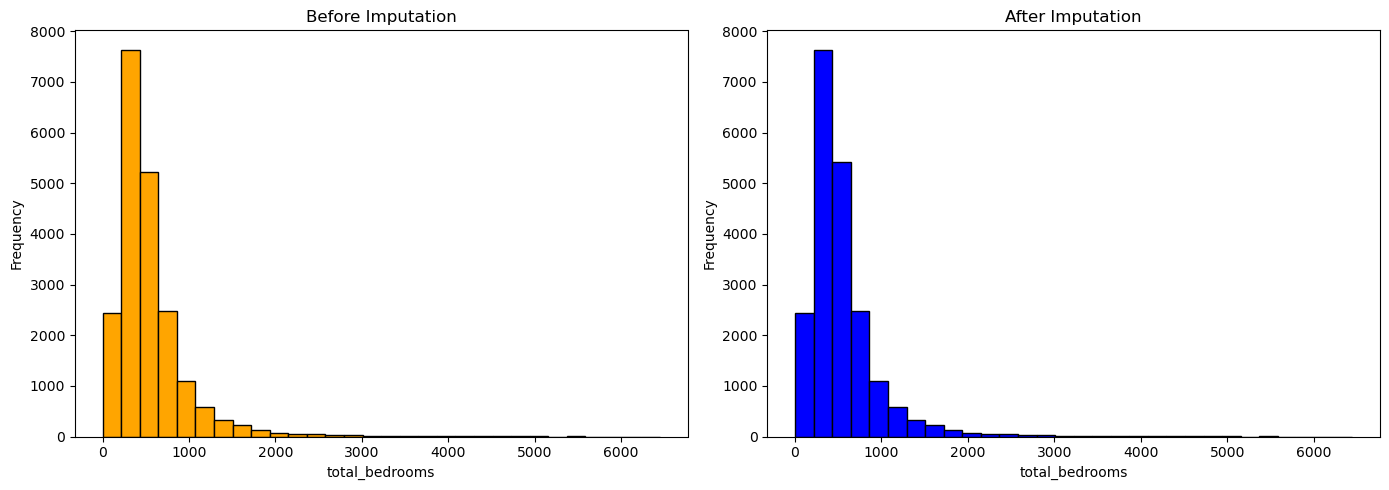

In [50]:
# Plot the histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before imputation
axes[0].hist(X['total_bedrooms'].dropna(), bins=30, edgecolor='black', color='orange')
axes[0].set_title("Before Imputation")
axes[0].set_xlabel("total_bedrooms")
axes[0].set_ylabel("Frequency")

# After imputation
axes[1].hist(X_imputed['total_bedrooms'], bins=30, edgecolor='black', color='blue')
axes[1].set_title("After Imputation")
axes[1].set_xlabel("total_bedrooms")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [51]:
# Prepare data before and after imputation
X = data_housing.drop('median_house_value', axis=1)

In [52]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [53]:
X_imputed = X.copy()
X_imputed['total_bedrooms'] = SimpleImputer(strategy='median').fit_transform(X[['total_bedrooms']])

In [54]:
X_imputed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [55]:
# Count missing values
nulls_before = X['total_bedrooms'].isnull().sum()
nulls_after = X_imputed['total_bedrooms'].isnull().sum()

In [56]:
nulls_before

np.int64(207)

In [57]:
nulls_after

np.int64(0)

In [58]:
# Create DataFrame for plotting
missing_data = pd.DataFrame({
    "Status": ["Before Imputation", "After Imputation"],
    "Missing Values": [nulls_before, nulls_after]
})

In [59]:
missing_data

,Status,Missing Values
0,Before Imputation,207
1,After Imputation,0


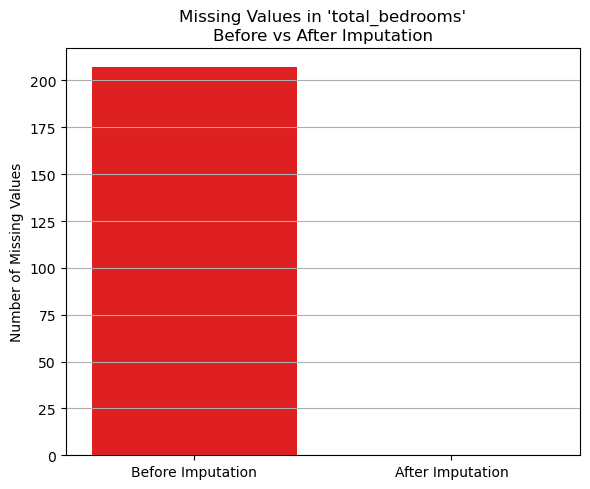

In [60]:
# Plot (corrected to avoid warning)
plt.figure(figsize=(6, 5))
sns.barplot(x="Status", y="Missing Values", hue="Status", legend=False,
            data=missing_data, palette=["red", "green"])
plt.title("Missing Values in 'total_bedrooms'\nBefore vs After Imputation")
plt.ylabel("Number of Missing Values")
plt.xlabel("")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

## 6.2 – ENCODE CATEGORICAL VARIABLES

In [61]:
# The column 'ocean_proximity' is categorical (object type).
# We convert it into numerical format using OneHotEncoder.
categorical_features = ['ocean_proximity']
categorical_features

['ocean_proximity']

In [62]:
# Step 1: Create encoder (standalone for this demo)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [63]:
# Step 2: Fit and transform 'ocean_proximity'
encoded_array = encoder.fit_transform(data_housing[categorical_features])
encoded_array

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [64]:
# Step 3: Convert result to DataFrame for inspection
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_features))
encoded_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [65]:
# Step 4: Show the result
print("✅ One-hot encoding completed. Sample of encoded variables:")
encoded_df.head()

✅ One-hot encoding completed. Sample of encoded variables:


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


## 6.3 – FEATURE SCALING + FULL PREPROCESSOR
Now we combine both numeric and categorical transformers into a ColumnTransformer.

In [66]:
# Feature groups
numeric_features = data_housing.select_dtypes(include=['float64']) \
                       .drop('median_house_value', axis=1).columns.tolist()
numeric_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [67]:
categorical_features = ['ocean_proximity']
categorical_features

['ocean_proximity']

In [68]:
# Numeric pipeline: impute + scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [69]:
# Categorical pipeline: one-hot encode
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
categorical_transformer

Pipeline(steps=[('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [70]:
# Combine into full preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['ocean_proximity'])])

In [71]:
print("✅ Preprocessor ready: numeric and categorical pipelines combined.")

✅ Preprocessor ready: numeric and categorical pipelines combined.


# 7 - SPLIT THE DATA
---

## 7.1 - Separate features and target variable

### data_housing

In [72]:
# Fit and transform the data (excluding target)
X_data_housing = data_housing.drop('median_house_value', axis=1)
X_data_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [73]:
X_scaled_data_housing = preprocessor.fit_transform(X_data_housing)
X_scaled_data_housing

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [74]:
y_data_housing = data_housing['median_house_value']
y_data_housing

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [75]:
# Convert scaled output to DataFrame for visualization
encoded_columns_data_housing = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
encoded_columns_data_housing

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [76]:
all_columns_data_housing = numeric_features + encoded_columns_data_housing.tolist()
all_columns_data_housing

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [77]:
X_scaled_df_scaled_data_housing = pd.DataFrame(X_scaled_data_housing, columns=all_columns_data_housing)
X_scaled_df_scaled_data_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388283,-0.512592,-0.443449,-1.216128,0.0,1.0,0.0,0.0,0.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.922403,-0.944405,-1.008420,-0.691593,0.0,1.0,0.0,0.0,0.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.123608,-0.369537,-0.174042,-1.142593,0.0,1.0,0.0,0.0,0.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.304827,-0.604429,-0.393753,-1.054583,0.0,1.0,0.0,0.0,0.0


In [78]:
# Show summary stats of scaled features
X_scaled_df_scaled_data_housing.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.44,0.32,0.00,0.11,0.13
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50,0.47,0.02,0.31,0.33
min,-2.39,-1.45,-2.20,-1.21,-1.28,-1.26,-1.30,-1.77,0.00,0.00,0.00,0.00,0.00
25%,-1.11,-0.80,-0.85,-0.54,-0.57,-0.56,-0.57,-0.69,0.00,0.00,0.00,0.00,0.00
50%,0.54,-0.64,0.03,-0.23,-0.24,-0.23,-0.24,-0.18,0.00,0.00,0.00,0.00,0.00
75%,0.78,0.97,0.66,0.23,0.25,0.26,0.28,0.46,1.00,1.00,0.00,0.00,0.00
max,2.63,2.96,1.86,16.82,14.09,30.25,14.60,5.86,1.00,1.00,1.00,1.00,1.00


### data_titanic

In [79]:
print(data_titanic.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [80]:
X_data_titanic = data_titanic[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

In [81]:
X_data_titanic

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S
...,...,...,...,...,...
886,2,male,27.0,13.0000,S
887,1,female,19.0,30.0000,S
888,3,female,NaN,23.4500,S
889,1,male,26.0,30.0000,C


In [82]:
y_data_titanic = data_titanic['Survived']

In [83]:
y_data_titanic

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [84]:
numeric_features_data_titanic = ['Age', 'Fare']
numeric_features_data_titanic

['Age', 'Fare']

In [85]:
categorical_features_data_titanic = ['Pclass', 'Sex', 'Embarked']
categorical_features_data_titanic

['Pclass', 'Sex', 'Embarked']

In [86]:
numeric_transformer_data_titanic = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numeric_transformer_data_titanic

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [87]:
categorical_transformer_data_titanic = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
categorical_transformer_data_titanic

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [88]:
preprocessor_data_titanic= ColumnTransformer([
    ('num', numeric_transformer_data_titanic, numeric_features_data_titanic),
    ('cat', categorical_transformer_data_titanic, categorical_features_data_titanic)
])
preprocessor_data_titanic

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Pclass', 'Sex', 'Embarked'])])

In [90]:
X_preprocessed_data_titanic = preprocessor_data_titanic.fit_transform(X_data_titanic)
X_preprocessed_data_titanic

array([[-0.56573582, -0.50244517,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.78684529,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.48885426,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705, -0.17626324,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.04438104,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.49237783,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

### data_roc

In [103]:
# Drop irrelevant or leak-prone columns
X_data_roc = data_roc[['Song Clean', 'ARTIST CLEAN', 'CALLSIGN', 'day_of_week']].copy()

In [104]:
X_data_roc

,Song Clean,ARTIST CLEAN,CALLSIGN,day_of_week
0,Caught Up in You,.38 Special,KGLK,0
1,Caught Up in You,.38 Special,KGB,6
2,Caught Up in You,.38 Special,KGB,4
3,Caught Up in You,.38 Special,KGLK,6
4,Caught Up in You,.38 Special,KGLK,5
...,...,...,...,...
37668,None,None,KGLK,4
37669,None,None,KGON,6
37670,None,None,KGLK,2
37671,None,None,KGLK,1


In [105]:
y_data_roc = data_roc['First?']

In [106]:
y_data_roc

0        1
1        0
2        0
3        0
4        0
        ..
37668    0
37669    0
37670    0
37671    0
37672    0
Name: First?, Length: 37673, dtype: int64

In [107]:
categorical_features_data_roc = X_data_roc.columns.tolist()

In [108]:
categorical_features_data_roc

['Song Clean', 'ARTIST CLEAN', 'CALLSIGN', 'day_of_week']

In [109]:
preprocessor_data_roc = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_data_roc)
])

In [110]:
preprocessor_data_roc

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Song Clean', 'ARTIST CLEAN', 'CALLSIGN',
                                  'day_of_week'])])

In [112]:
X_processed_data_roc = preprocessor_data_roc.fit_transform(X_data_roc)

In [113]:
X_processed_data_roc

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 150692 stored elements and shape (37673, 2668)>

In [114]:
X_processed_data_roc = preprocessor_data_roc.fit_transform(X_data_roc)
print(f'✅ Processed features shape: {X_processed_data_roc.shape}')

✅ Processed features shape: (37673, 2668)


### data_imagenet

In [117]:
# Basic standardization
data_imagenet['class_name_clean'] = data_imagenet['class_name'].str.lower().str.replace('-', ' ').str.replace('_', ' ')
data_imagenet['class_name_clean'] = data_imagenet['class_name_clean'].str.replace(r'[^a-z ]+', '', regex=True)
data_imagenet.head()

,class_name,length,first_letter,class_name_clean
0,"n01440764 tench, Tinca tinca",28,n,n tench tinca tinca
1,"n01443537 goldfish, Carassius auratus",37,n,n goldfish carassius auratus
2,"n01484850 great white shark, white shark, man-...",93,n,n great white shark white shark man eater man ...
3,"n01491361 tiger shark, Galeocerdo cuvieri",41,n,n tiger shark galeocerdo cuvieri
4,"n01494475 hammerhead, hammerhead shark",38,n,n hammerhead hammerhead shark


## 7.2 - Split the dataset into training and test sets

### data_housing

In [118]:
X_train_data_housing, X_test_data_housing, y_train_data_housing, y_test_data_housing = train_test_split(X_data_housing, y_data_housing, test_size=0.2, random_state=42)


In [119]:
X_train_data_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


In [120]:
X_test_data_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,INLAND


In [121]:
y_train_data_housing

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [122]:
y_test_data_housing

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64

### data_titanic

In [129]:
X_train_data_titanic, X_test_data_titanic, y_train_data_titanic, y_test_data_titanic = train_test_split(X_preprocessed_data_titanic, y_data_titanic, test_size=0.2, random_state=42)

In [130]:
X_train_data_titanic

array([[ 1.24023435, -0.07458307,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.48888602, -0.38667072,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.20276213, -0.48885426,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.89441028, -0.36435545,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.18053417,  1.76774081,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.64258561,  0.90773798,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [131]:
X_test_data_titanic

array([[-0.10463705, -0.34145224,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.12591233, -0.43700744,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.71943541, -0.48885426,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.6638609 , -0.01644416,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.94998479, -0.43700744,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.94903212, -0.31217238,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [132]:
y_train_data_titanic

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [133]:
y_test_data_titanic

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [135]:
print(f'Train shape: {X_train_data_titanic.shape}, Test shape: {X_test_data_titanic.shape}')

Train shape: (712, 10), Test shape: (179, 10)


### data_roc

In [138]:
X_train_data_roc, X_test_data_roc, y_train_data_roc, y_test_data_roc = train_test_split(X_processed_data_roc, y_data_roc, test_size=0.2, random_state=42)

In [139]:
X_train_data_roc

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 120552 stored elements and shape (30138, 2668)>

In [140]:
X_test_data_roc

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30140 stored elements and shape (7535, 2668)>

In [141]:
y_train_data_roc

25813    0
7020     0
30848    0
3036     1
31434    0
        ..
16850    0
6265     0
11284    0
860      0
15795    0
Name: First?, Length: 30138, dtype: int64

In [142]:
y_test_data_roc

22429    0
30193    0
10989    0
27820    0
26752    0
        ..
575      0
27112    0
4189     0
4235     0
8239     0
Name: First?, Length: 7535, dtype: int64

In [143]:
print(f'Train shape: {X_train_data_roc.shape}, Test shape: {X_test_data_roc.shape}')

Train shape: (30138, 2668), Test shape: (7535, 2668)


### data_imagenet

In [145]:
# We can split classes into groups for manual use (e.g., 80% train, 20% holdout)
train_classes_data_imagenet, test_classes_data_imagenet = train_test_split(data_imagenet['class_name_clean'], test_size=0.2, random_state=42)

In [146]:
train_classes_data_imagenet

29            n axolotl mud puppy ambystoma mexicanum
535                           n disk brake disc brake
695                                         n padlock
557                              n flagpole flagstaff
836                                        n sunglass
                            ...                      
106                                          n wombat
270    n white wolf arctic wolf canis lupus tundrarum
860       n tobacco shop tobacconist shop tobacconist
435                    n bathtub bathing tub bath tub
102                 n echidna spiny anteater anteater
Name: class_name_clean, Length: 800, dtype: object

In [147]:
test_classes_data_imagenet

521                        n crock pot
737           n pop bottle soda bottle
740                      n power drill
660    n mobile home manufactured home
411                            n apron
                    ...               
408     n amphibian amphibious vehicle
332             n angora angora rabbit
208               n labrador retriever
613                         n joystick
78                              n tick
Name: class_name_clean, Length: 200, dtype: object

## 7.3 - Display dimensions to verify the split

### data_housing

In [123]:
print('X_train:', X_train_data_housing.shape)
print('X_test:', X_test_data_housing.shape)
print('y_train:', y_train_data_housing.shape)
print('y_test:', y_test_data_housing.shape)

X_train: (16512, 9)
X_test: (4128, 9)
y_train: (16512,)
y_test: (4128,)


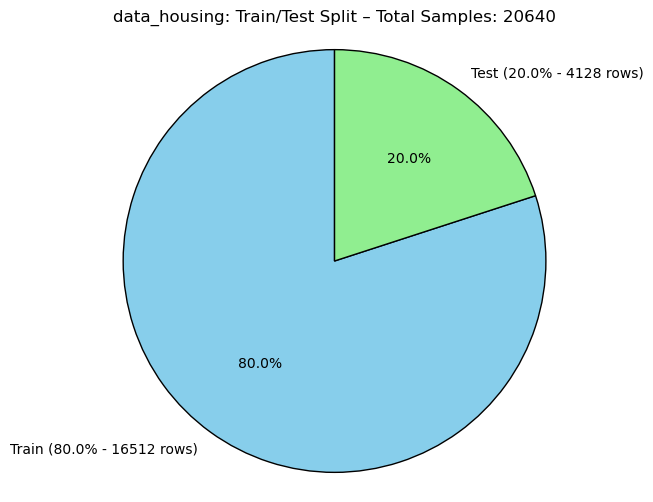

In [128]:
# Step 2: Compute totals and percentages
total_rows = len(data_housing)
train_rows = len(X_train_data_housing)
test_rows = len(X_test_data_housing)

train_pct = round(train_rows / total_rows * 100, 2)
test_pct = round(test_rows / total_rows * 100, 2)

# Step 3: Define pie chart labels and sizes
labels = [
    f"Train ({train_pct}% - {train_rows} rows)",
    f"Test ({test_pct}% - {test_rows} rows)"
]
sizes = [train_rows, test_rows]
colors = ['skyblue', 'lightgreen']

# Step 4: Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title(f"data_housing: Train/Test Split – Total Samples: {total_rows}")
plt.axis('equal')  # Keeps the pie chart as a circle
plt.show()

### data_titanic

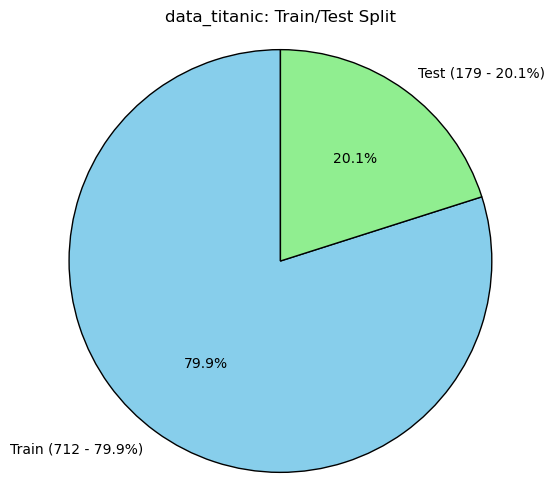

In [148]:
# Visual Pie Chart of the Split
total = len(data_titanic)
train_rows, test_rows = len(X_train_data_titanic), len(X_test_data_titanic)

labels = [
    f'Train ({train_rows} - {100*train_rows/total:.1f}%)',
    f'Test ({test_rows} - {100*test_rows/total:.1f}%)'
]

plt.figure(figsize=(6, 6))
plt.pie(
    [train_rows, test_rows],
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('data_titanic: Train/Test Split')
plt.axis('equal')
plt.show()

### data_roc

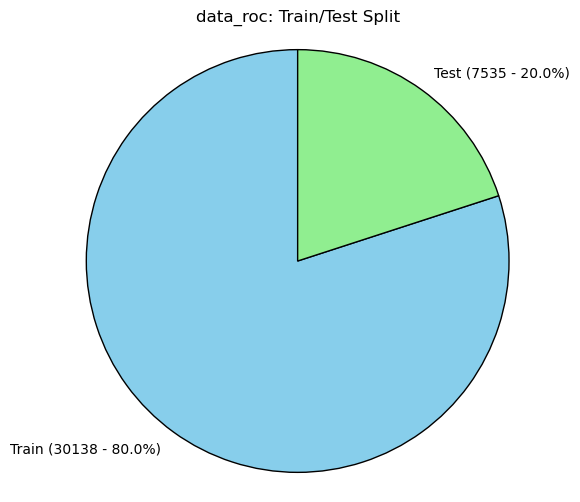

In [149]:
# Pie chart with custom labels showing both count and percentage
train_rows = X_train_data_roc.shape[0]
test_rows = X_test_data_roc.shape[0]
total_rows = train_rows + test_rows

labels = [
    f'Train ({train_rows} - {100 * train_rows / total_rows:.1f}%)',
    f'Test ({test_rows} - {100 * test_rows / total_rows:.1f}%)'
]
sizes = [train_rows, test_rows]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    startangle=90,
    colors=['skyblue', 'lightgreen'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('data_roc: Train/Test Split')
plt.axis('equal')
plt.show()